In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 27.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 18.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 63 kB 281 kB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 33.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [11]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:24 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:16 +0000 2021'
'Wed Nov 03 20:23:16 +0000 2021'
'Wed Nov 03 20:23:15 +0000 2021'
'Wed Nov 03 20:23:15 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:13 +0000 2021'
'Wed Nov 0

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:15:19 +0000 2021'
'Wed Nov 03 20:15:19 +0000 2021'
'Wed Nov 03 20:15:18 +0000 2021'
'Wed Nov 03 20:15:17 +0000 2021'
'Wed Nov 03 20:15:17 +0000 2021'
'Wed Nov 03 20:15:16 +0000 2021'
'Wed Nov 03 20:15:16 +0000 2021'
'Wed Nov 03 20:15:16 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:15 +0000 2021'
'Wed Nov 03 20:15:14 +0000 2021'
'Wed Nov 03 20:15:13 +0000 2021'
'Wed Nov 03 20:15:13 +0000 2021'
'Wed Nov 03 20:15:13 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:12 +0000 2021'
'Wed Nov 03 20:15:11 +0000 2021'
'Wed Nov 03 20:15:10 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:09 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:08 +0000 2021'
'Wed Nov 03 20:15:06 +0000 2021'
'Wed Nov 03 20:15:06 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:13:18 +0000 2021'
'Wed Nov 03 20:13:18 +0000 2021'
'Wed Nov 03 20:13:18 +0000 2021'
'Wed Nov 03 20:13:17 +0000 2021'
'Wed Nov 03 20:13:16 +0000 2021'
'Wed Nov 03 20:13:14 +0000 2021'
'Wed Nov 03 20:13:13 +0000 2021'
'Wed Nov 03 20:13:13 +0000 2021'
'Wed Nov 03 20:13:13 +0000 2021'
'Wed Nov 03 20:13:12 +0000 2021'
'Wed Nov 03 20:13:11 +0000 2021'
'Wed Nov 03 20:13:11 +0000 2021'
'Wed Nov 03 20:13:10 +0000 2021'
'Wed Nov 03 20:13:10 +0000 2021'
'Wed Nov 03 20:13:08 +0000 2021'
'Wed Nov 03 20:13:08 +0000 2021'
'Wed Nov 03 20:13:07 +0000 2021'
'Wed Nov 03 20:13:07 +0000 2021'
'Wed Nov 03 20:13:05 +0000 2021'
'Wed Nov 03 20:13:04 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:03 +0000 2021'
'Wed Nov 03 20:13:02 +0000 2021'
'Wed Nov 03 20:13:02 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:01 +0000 2021'
'Wed Nov 03 20:13:00 +0000 2021'
'Wed Nov 03 20:13:00 +0000 2021'
'Wed Nov 0

KeyboardInterrupt: 

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

1286
1182


In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain covid

In [20]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Covid-19 Ö-Watch
text: 🇦🇹 NBA-Legionär Pöltl ins Covid-Protokoll aufgenommen https://t.co/20ILkg5kiC #covid19 #corona #covid
----
name: Covid-19 Ö-Watch
text: 🇦🇹 Jakob Pöltl im Covid-Protokoll der NBA? https://t.co/A7ybyL36VJ #covid #covid19 #corona
----
name: @COVID_Evidence
text: RT @COVID_Evidence: LitCovid:  COVID-19 "Green Pass": a Lesson on the Proportionality Principle from Galicia.: {'title': 'COVID-19 "Green P…
----
name: Marius
text: RT @FezileDabiDM: FEZILE DABI DISTRICT COVID-19 CASES UPDATE. 

The Fezile Dabi District COVID-19 cases UPDATE as of the 3rd of November 20…
----
name: Secoc-RS
text: Pfizer testa medicamento contra a covid-19 em brasileiros - https://t.co/v8FVIJbpV3
----
name: Investing.com Stocks
text: Qiagen Q3 profit surges on COVID-19 testing demand - https://t.co/WnyqM58jtQ
----
name: NewsNet
text: RT @BusinessBriefTV: Watch @AndyReports' full interview with Dr. @PeterHotez, who breaks down the latest in the fight against COVID-19, as…
----
name:

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vaccine

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status
0,6182f383325a1d44b6344043,Wed Nov 03 20:13:00 +0000 2021,1455991422839054337,1455991422839054337,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,613,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,6182f380325a1d44b6343fea,Wed Nov 03 20:13:56 +0000 2021,1455991656809893889,1455991656809893889,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,613,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,6182f37f325a1d44b6343fb5,Wed Nov 03 20:14:23 +0000 2021,1455991768902688770,1455991768902688770,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,613,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,6182f37f325a1d44b6343fac,Wed Nov 03 20:14:25 +0000 2021,1455991778557956104,1455991778557956104,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,613,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,6182f37f325a1d44b6343f90,Wed Nov 03 20:14:37 +0000 2021,1455991826901606412,1455991826901606412,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,613,0,False,False,en,NaN,NaN,NaN,NaN,NaN
5,6182f37e325a1d44b6343f80,Wed Nov 03 20:14:44 +0000 2021,1455991858413416448,1455991858413416448,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,611,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,6182f37d325a1d44b6343f4c,Wed Nov 03 20:15:04 +0000 2021,1455991939451572235,1455991939451572235,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,611,0,False,False,en,NaN,NaN,NaN,NaN,NaN
7,6182f37d325a1d44b6343f3f,Wed Nov 03 20:15:08 +0000 2021,1455991959261257732,1455991959261257732,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,611,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,6182f37d325a1d44b6343f33,Wed Nov 03 20:15:13 +0000 2021,1455991980002054150,1455991980002054150,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,611,0,False,False,en,NaN,NaN,NaN,NaN,NaN
9,6182f101325a1d44b6343eff,Wed Nov 03 20:15:34 +0000 2021,1455992065540517888,1455992065540517888,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,582,0,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

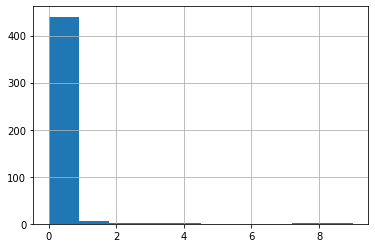

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count